# Pymaceuticals Inc.
---

### Analysis

  1. Capomulin and Ramicane were used most often to treat the mice, while Propriva was used the least often. Looking at the mean volumes of the tumors, Capomulin and Ramicane had the lowest average tumor volume. 
  2. Observing the line graph for mouse l509, after an initial increase in tumor volume, there was a sharp decrease in tumor volume over time. This suggests that Capomulin could be helpful in reducing tumor size for this mouse.
  3. There was a correlation of 0.84 between mouse weight and average tumor volume. This suggests there is a strong positive correlation between the two, and as mouse weight increases, so does the average tumor volume. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_items = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
duplicate_items.unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_df = merged_df.loc[merged_df['Mouse ID'] == 'g989',:]
duplicated_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_g989 = merged_df[merged_df['Mouse ID'] == 'g989'].index
cleaned_df = merged_df.drop(index_g989, inplace=False)
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumors_mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
tumors_median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
tumors_var = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
tumors_dev = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
tumors_sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_df = pd.DataFrame({"Mean Tumor Volume" : tumors_mean,
                                 "Median Tumor Volume" : tumors_median,
                                 "Tumor Volume Variance": tumors_var,
                                 "Tumor Volume Std. Dev." : tumors_dev,
                                 "Tumor Volume Std. Err." : tumors_sem})

tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg_df = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
tumor_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

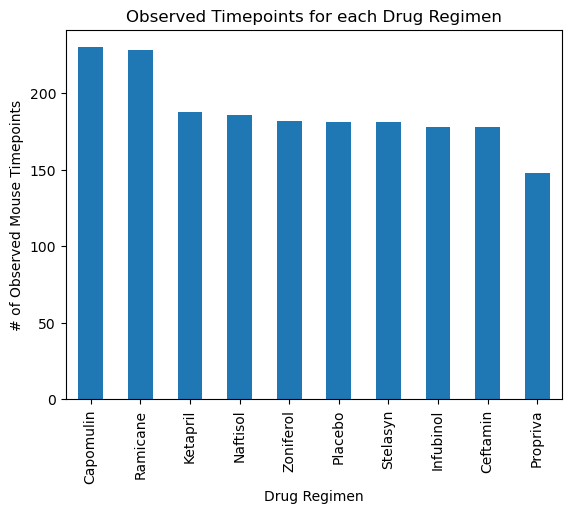

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Getting the counts for each grug regimen
drug_counts = cleaned_df['Drug Regimen'].value_counts()

#Plotting
drug_counts.plot(kind='bar')
plt.title('Observed Timepoints for each Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

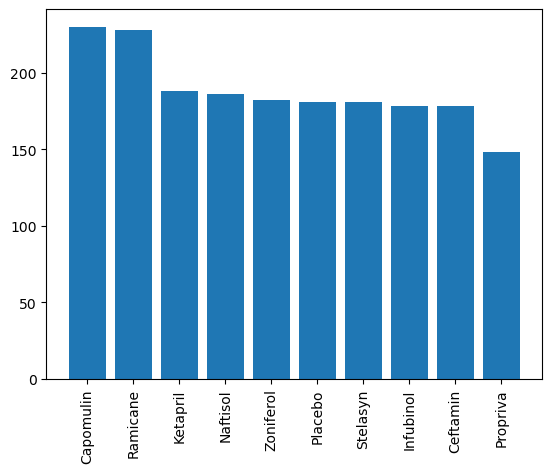

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Getting the drug regimen names as the x axis and the counts as the y axis
x_axis = drug_counts.index
y_axis = drug_counts.values

# Plotting
plt.bar(x_axis, y_axis, align='center')
plt.xticks(rotation = 90)
plt.show()

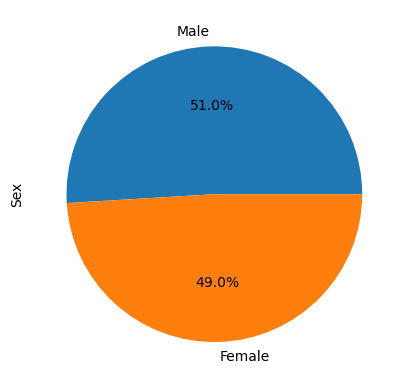

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Getting the gender counts for each gender
gender_count = cleaned_df['Sex'].value_counts()

# Plotting
gender_count.plot(kind='pie', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

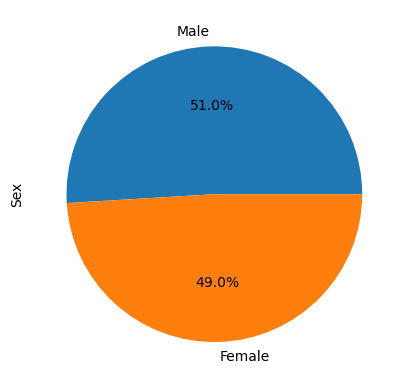

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Plotting
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Creating a new DataFrame that will hold the data for Capomulin, Ramicane, Infubinol, and Ceftamin
new_df = cleaned_df.loc[(merged_df['Drug Regimen'] == 'Capomulin') | (merged_df['Drug Regimen'] == 'Ramicane') | 
                        (merged_df['Drug Regimen'] == 'Infubinol') | (merged_df['Drug Regimen'] == 'Ceftamin'),:]

# Start by getting the last (greatest) timepoint for each mouse
final_times = pd.DataFrame(new_df.groupby(['Drug Regimen','Mouse ID']).max()['Timepoint'])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merged_df = pd.merge(final_times, cleaned_df, on=("Mouse ID", "Timepoint"), how='left')
new_merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,45,Ramicane,Male,1,17,30.276232,0
96,u196,45,Ramicane,Male,18,25,40.667713,3
97,w678,5,Ramicane,Female,5,24,43.166373,0
98,y449,15,Ramicane,Male,19,24,44.183451,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Creating an empty list to hold the potential tumor volume outliers
outliers=[]

# Creating a variable to hold the index for each regimen when looking for outliers
index = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers 
for treatment in treatment_list:
    # Create new DataFrame that holds the data for each Drug Regimen in for loop
    drug_df = new_merged_df.loc[new_merged_df['Drug Regimen'] == treatment,:]
    
    # Creating a DataFrame that holds the tumor volumes for each Drug Regimen
    drug_tumors_df = drug_df['Tumor Volume (mm3)']
    
    # Calculating quartiles, iqr, and bounds
    quartiles = drug_tumors_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Appending the list of tumor volumes to the tumor_vol list
    tumor_vol.append(drug_tumors_df)
    
    # Find the potential outliers and append to the outliers list
    for value in tumor_vol[index]:
        if (value < lower_bound) | (value > upper_bound):
            outliers.append(value)
            
    # Print the potential outliers
    print(f'{outliers} are possible outliers for {treatment}')

    # Reset the outliers list to be empty for the next drug regimen
    outliers=[]

    # Increase the index to look for outliers in the next regimen list
    index = index + 1

[] are possible outliers for Capomulin
[] are possible outliers for Ramicane
[36.3213458] are possible outliers for Infubinol
[] are possible outliers for Ceftamin


<function matplotlib.pyplot.show(close=None, block=None)>

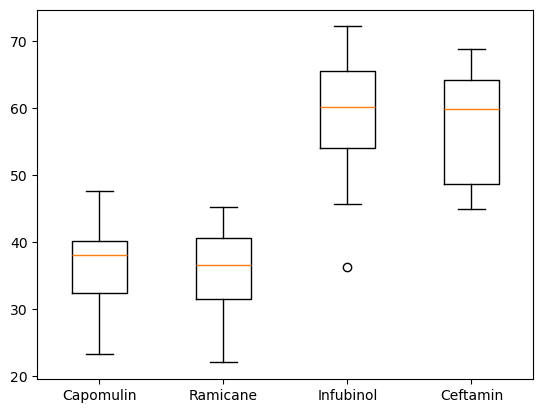

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = treatment_list)
plt.show

## Line and Scatter Plots

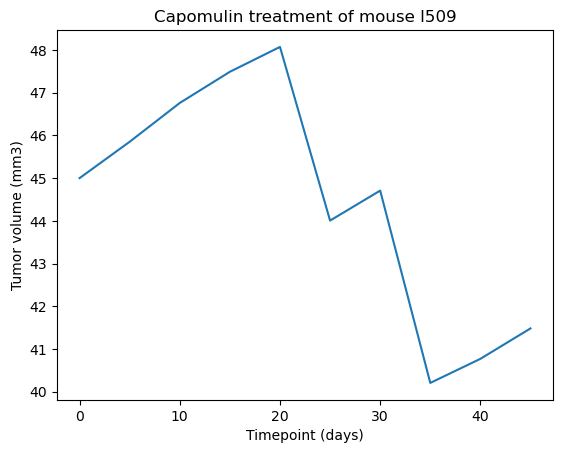

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Creating a new DataFrame to hold the Capomulin data
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin',:]

# Creating a new DataFrame to hold data for l509 that is treated with Capomulin
l509_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509',:]

# Setting the x axis as the timepoints and y axis as the tumor volume
x_axis = l509_df['Timepoint']
y_axis = l509_df['Tumor Volume (mm3)']

# Plotting
plt.plot(x_axis, y_axis)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor volume (mm3)')
plt.show()

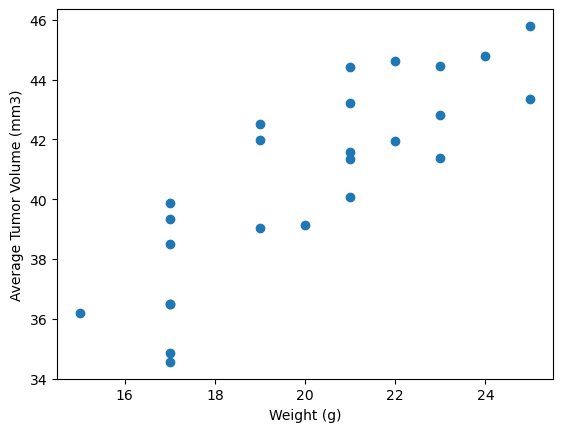

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Creating a groupby object based on Mouse ID
grouped_cap = capomulin_df.groupby(['Mouse ID'])

# Finding the average tumor volume and weight of the grouped by object
cap_avg = grouped_cap[['Tumor Volume (mm3)','Weight (g)']].mean()
cap_avg

# Plotting
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


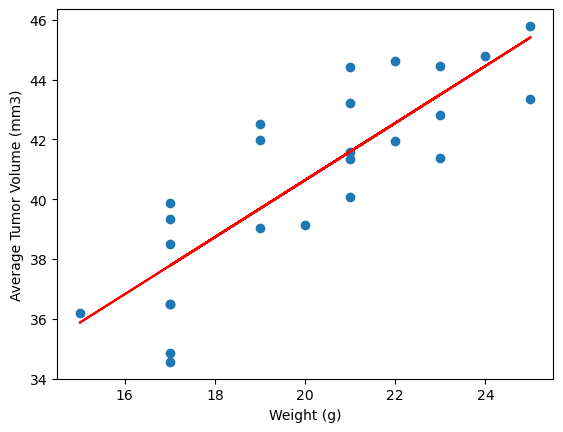

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

# Plotting
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
regress_values = cap_avg['Weight (g)'] * slope + intercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'], regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()